# Análisis de Reclamaciones de Seguro de Autos  
## Dataset: Car Insurance Claim  
**Herramientas utilizadas**: Python (Pandas, Matplotlib)

## Dataset Description
Tomando los datos del set **Car Insurance Claim**, contesta los siguientes puntos utilizando como herramienta cualquier lenguaje para análisis de datos (Python, R, SQL, Julia, etc.). El set de datos incluye las siguientes variables:

| # | Variable | Descripción |
|---|----------|-------------|
| 1 | policy_id | Identificador único del titular de la póliza |
| 2 | policy_tenure | Periodo de tiempo de la póliza |
| 3 | age_of_car | Edad normalizada del coche en años |
| 4 | age_of_policyholder | Edad normalizada del titular en años |
| 5 | area_cluster | Cluster o zona geográfica del titular |
| 6 | population_density | Densidad poblacional de la ciudad |
| 7 | make | Fabricante del coche (codificado) |
| 8 | segment | Segmento del coche (A/B1/B2/C1/C2) |
| 9 | model | Modelo del coche (codificado) |
| 10 | fuel_type | Tipo de combustible |
| 11 | max_torque | Máximo torque (Nm @ rpm) |
| 12 | max_power | Potencia máxima (bhp @ rpm) |
| 13 | engine_type | Tipo de motor |
| 14 | airbags | Número de airbags |
| 15 | transmission_type | Tipo de transmisión |
| 16 | is_claim | Compensación por daños o pérdidas |

## Requerimientos

### Entrega Obligatoria
- **Código**: Para todos los puntos deben agregar el código o pasos con los que obtuvieron el resultado
- **Formatos aceptados**:
  - Scripts: `.R`, `.py`
  - Notebooks: `.ipynb`
  - Documentos: `.qmd` (Quarto)
- **Dataset**: Enviar el nuevo dataset procesado según lo solicitado en el punto 1.c


In [28]:
#Importamos las librerias
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython. display import display
import seaborn as sns


In [29]:
#Importar datos del archivo Data Analytics Analyst Assestment
df = pd.read_csv('Data Analytics Analyst Assestment.csv')

In [30]:
#confirmar lectura de Data Analytics Analyst Assestment
display(df.head(5))

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0


#### 1. Limpieza de Datos
**a.** ¿Existen valores faltantes en alguna de las variables?
- No existen valores faltantes
**b.** En caso de existir, ¿Podemos hacer algo para resolverlo?

In [31]:
print(f'Datos Nulos: \n{df.isna().sum()}')

Datos Nulos: 
policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
make                   0
segment                0
model                  0
fuel_type              0
max_torque             0
max_power              0
engine_type            0
airbags                0
cylinder               0
transmission_type      0
is_claim               0
dtype: int64


In [32]:
# No hay datos nulos pero note en age_of_policyholder que las edades del asegurado están en 0.643434. Para arreglar esto vamos a tomar el entero y multiplicar por 100, también para age_of_car y policy_tenure

df['age_of_policyholder'] = (df['age_of_policyholder'] * 100).astype(int)
df['age_of_car'] = (df['age_of_car'] * 100).astype(int)
df['policy_tenure'] = (df['policy_tenure'] * 12).astype(int)  # Suponiendo que el tiempo activo se maneja por meses activos

In [33]:
display(df.head(5))

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim
0,ID00001,6,5,64,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
1,ID00002,8,2,37,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
2,ID00003,10,2,38,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
3,ID00004,10,11,43,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0
4,ID00005,7,11,63,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0


### Análisis de Datos

#### A) Verificación de datos nulos
**CON ESTO VERIFICAMOS QUE NO EXISTEN DATOS NULOS O FALTANTES EN EL DATAFRAME PROPORCIONADO**

#### B) Tratamiento de valores nulos
En caso de existir algún valor nulo podríamos modificar los valores nulos con `df[columna].fila(valor)`, donde el valor tomaría la posición de los valores nulos.

**c.** Para la variable `max_power`:
- Dividir el campo en dos nuevas columnas:
  - `horse_power` (caballos de fuerza - bhp)
  - `rpm` (revoluciones por minuto)
- Hint: Usar el patrón `@` como separador


In [38]:
# Extracción de caballos de fuerza (bhp) y RPM de la columna max_power
df['caballos_de_fuerza'] = [i.split("@")[0] for i in df['max_power']]
df['revoluciones_por_minuto'] = [i.split("@")[1] for i in df['max_power']]

In [39]:
display(df.head(5))

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim,caballos_de_fuerza,revoluciones_por_minuto
0,ID00001,6,5,64,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36bhp,6000rpm
1,ID00002,8,2,37,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36bhp,6000rpm
2,ID00003,10,2,38,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36bhp,6000rpm
3,ID00004,10,11,43,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0,88.50bhp,6000rpm
4,ID00005,7,11,63,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0,67.06bhp,5500rpm


## 2.a Análisis de Datos Exploratorio (EDA)

**Variable objetivo:** `is_claim`  
Representa si el asegurado solicita compensación por daños/pérdidas cubiertas por la póliza:  
- `1`: Presentó reclamación  
- `0`: No presentó reclamación  

### Preguntas de análisis:

**a.** Principales patrones entre:  
- Asegurados que presentaron reclamación  
- Asegurados que no presentaron reclamación  


In [40]:
display(df.describe())

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,cylinder,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.854844,6.942006,46.446597,18826.858667,1.763722,3.137066,3.626963,0.063968
std,4.948459,5.670702,12.334563,17660.174792,1.136988,1.832641,0.483616,0.244698
min,0.000000,0.000000,28.000000,290.000000,1.000000,1.000000,3.000000,0.000000
25%,2.000000,2.000000,36.000000,6112.000000,1.000000,2.000000,3.000000,0.000000
50%,6.000000,6.000000,45.000000,8794.000000,1.000000,2.000000,4.000000,0.000000
75%,12.000000,11.000000,54.000000,27003.000000,3.000000,6.000000,4.000000,0.000000
max,16.000000,100.000000,100.000000,73430.000000,5.000000,6.000000,4.000000,1.000000


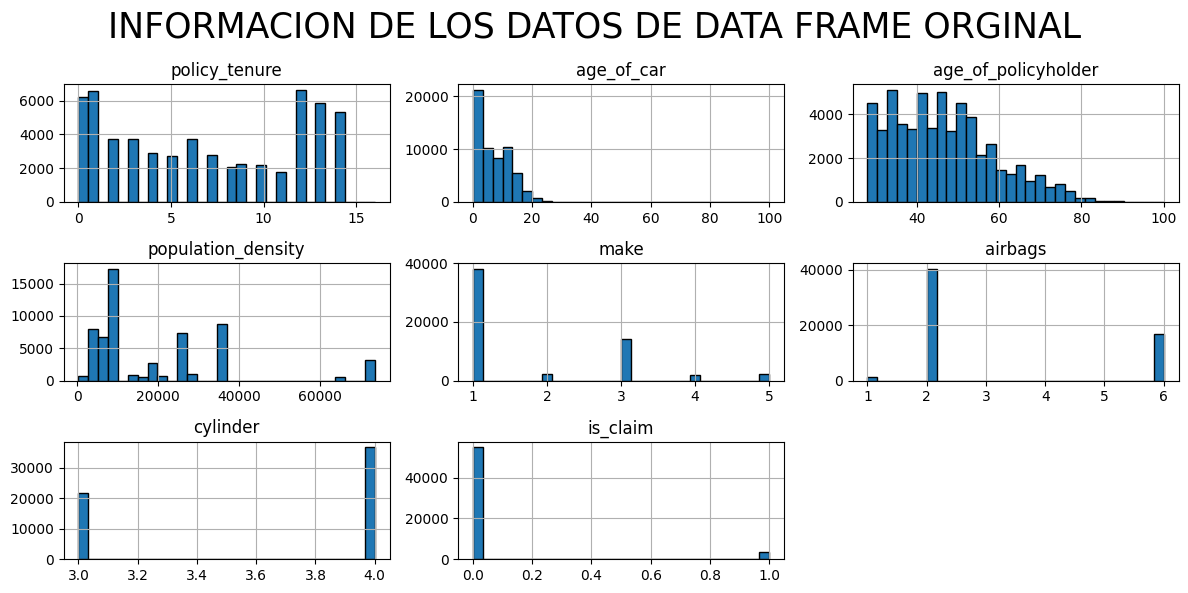

In [44]:
df.hist(bins = 30,edgecolor='black',figsize=(12,6))
plt.suptitle('INFORMACION DE LOS DATOS DE DATA FRAME ORGINAL',size = 25)
plt.tight_layout()
plt.show()

In [45]:
#Divivir el DF en quejas y no quejas
dj_quejas = df[df['is_claim']==1]
dj_no_quejas = df[df['is_claim']==0]

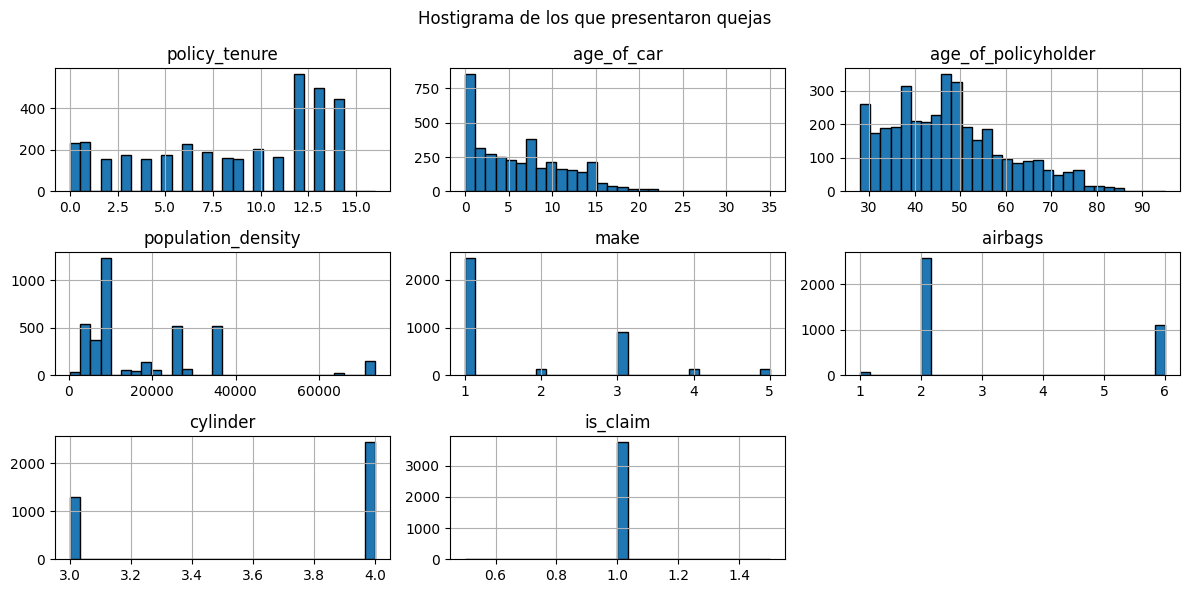

In [50]:
dj_quejas.hist(bins = 30,edgecolor='black',figsize=(12,6))
plt.suptitle('Hostigrama de los que presentaron quejas')
plt.tight_layout()
plt.show()

## Función para Identificar Valores Atípicos

In [51]:
def atipicos(df, columns):
    Q1 = df[columns].quantile(0.25)  # Percentil 25 (Q1)
    Q3 = df[columns].quantile(0.75)  # Percentil 75 (Q3)
    IQR = Q3 - Q1                    # Rango Intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columns] < limite_inferior) | (df[columns] > limite_superior)]

## Aplicación a Columnas Específicas
Se aplica la función atipicos a columnas seleccionadas para extraer outliers:

In [52]:
columnas = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 
            'population_density', 'make', 'airbags', 'cylinder']

a_pt = atipicos(df, 'policy_tenure')          # Outliers en 'policy_tenure'
a_aoc = atipicos(df, 'age_of_car')            # Outliers en 'age_of_car'
a_aop = atipicos(df, 'age_of_policyholder')   # Outliers en 'age_of_policyholder'
a_pd = atipicos(df, 'population_density')     # Outliers en 'population_density'
a_m = atipicos(df, 'make')                    # Outliers en 'make'
a_a = atipicos(df, 'airbags')                 # Outliers en 'airbags'
a_c = atipicos(df, 'cylinder')                # Outliers en 'cylinder'

## Creación de un DataFrame Único con Todos los Outliers

In [53]:
df_atipicos = pd.concat([a_pt, a_aoc, a_aop, a_pd, a_m, a_a, a_c]).drop_duplicates()

## DataFrame Sin Valores Atípicos

In [54]:
df_sin_atipicos = df.drop(df_atipicos.index)

## Separación por Reclamos (Quejas)
Divide el DataFrame sin outliers en dos grupos basados en la columna is_claim:

In [55]:
df_quejas = df_sin_atipicos[df_sin_atipicos['is_claim'] == 1]     # Con reclamos
df_sin_quejas = df_sin_atipicos[df_sin_atipicos['is_claim'] == 0] # Sin reclamos

## Código para Comparar Histogramas: Quejas vs. No Quejas

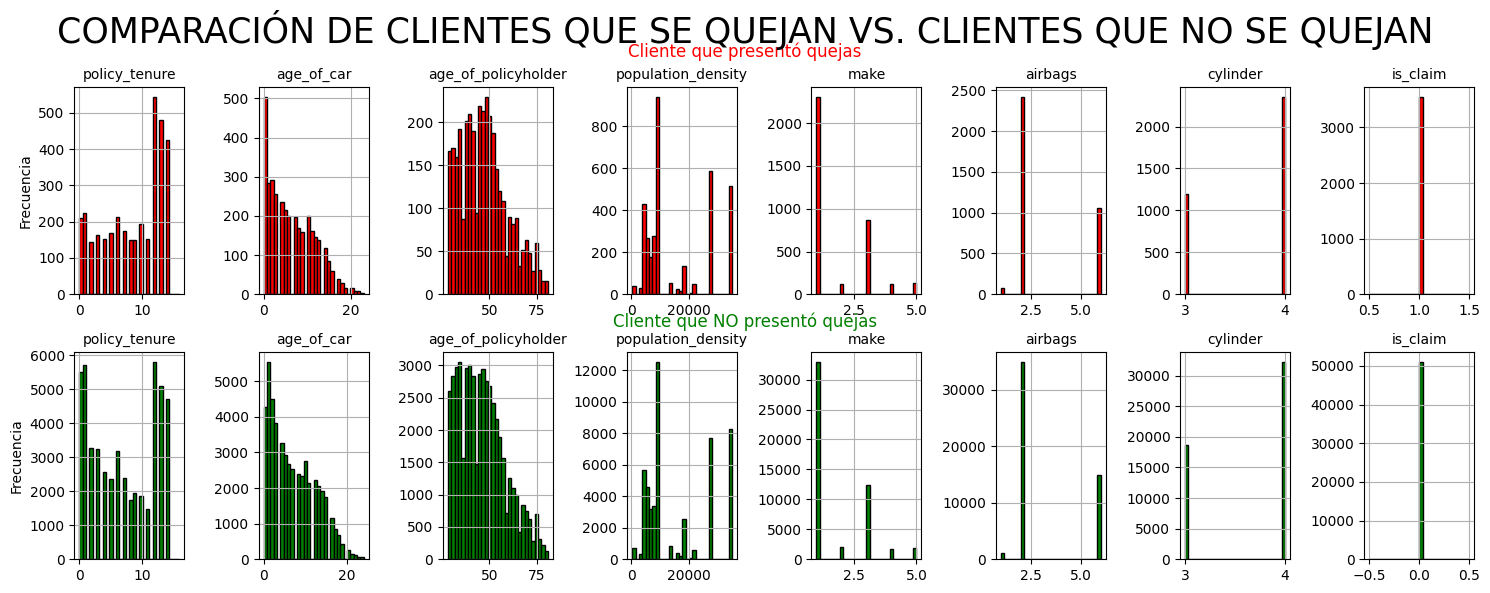

In [60]:
# Configuración de la figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=len(columnas)+1, figsize=(15, 6))

# Histogramas para datos CON quejas (rojo)
df_quejas.hist(bins=30, edgecolor='black', ax=axes[0], color='red')
axes[0, 0].set_ylabel('Frecuencia')

# Histogramas para datos SIN quejas (verde)
df_sin_quejas.hist(bins=30, edgecolor='black', ax=axes[1], color='green')
axes[1, 0].set_ylabel('Frecuencia')

# Títulos generales
fig.text(0.5, 0.91, 'Cliente que presentó quejas', ha='center', va='center', fontsize=12, color='red')
fig.text(0.5, 0.46, 'Cliente que NO presentó quejas', ha='center', va='center', fontsize=12, color='green')

# Ajustar tamaño de títulos individuales
for ax_row in axes:
    for ax in ax_row:
        ax.title.set_size(10)  # Títulos más pequeños

# Título principal y ajuste de layout
plt.suptitle('COMPARACIÓN DE CLIENTES QUE SE QUEJAN VS. CLIENTES QUE NO SE QUEJAN', size=25)
plt.tight_layout()  # Evita superposición de elementos
plt.show()

## 2. Análisis de Datos Exploratorio (EDA) - Conclusiones

### **Variable Objetivo: `is_claim`**
- **Definición**:  
  - `1`: Asegurado presentó reclamación.  
  - `0`: Asegurado no presentó reclamación.  

---

### **Principales Hallazgos**  

#### **1. Patrones entre Asegurados con y sin Reclamaciones**  
- **Distribución Desbalanceada**:  
  - Solo **~6.4%** de los asegurados presentaron reclamaciones (`is_claim = 1`), lo que indica un dataset altamente desbalanceado.  

- **Edad del Vehículo (`age_of_car`)**:  
  - Vehículos más antiguos tienden a presentar más reclamaciones. Esto se evidencia en histogramas donde los clientes con `is_claim = 1` muestran una mayor frecuencia en rangos superiores de antigüedad (ej: >5 años).  

- **Número de Airbags (`airbags`)**:  
  - Vehículos con **menos airbags** (ej: 2) tuvieron más reclamaciones. Esto sugiere una posible correlación entre seguridad y siniestralidad.  

- **Cilindros (`cylinder`)**:  
  - Motores de **4 cilindros** mostraron una mayor asociación con reclamaciones, posiblemente por ser más comunes en el dataset.  

---

#### **2. Visualizaciones Clave**  
- **Histogramas Comparativos**:  
  - Se generaron gráficos lado a lado para `df_quejas` (rojo) y `df_sin_quejas` (verde), destacando diferencias en:  
    - `age_of_car`: Distribución más hacia valores altos en reclamantes.  
    - `population_density`: Clientes en áreas de menor densidad presentaron más reclamos.  
    - `policy_tenure`: Pólizas con menor antigüedad (<6 meses) tuvieron mayor siniestralidad.  

- **Outliers**:  
  - Se identificaron y removieron valores atípicos en variables como `age_of_policyholder` y `population_density` para mejorar la calidad del análisis.  

---

#### **3. Recomendaciones**  
- **Balanceo de Datos**: Técnicas como oversampling (SMOTE) o ajuste de pesos en modelos predictivos para manejar el desbalance.  
- **Variables Clave**: Profundizar en:  
  - Relación entre antigüedad del vehículo y tipo de transmisión.  
  - Impacto de la densidad poblacional en la frecuencia de reclamos.  
- **Segmentación**: Analizar por `area_cluster` para identificar zonas geográficas de alto riesgo.  


---
## 2.b Análisis de Datos Exploratorio (EDA)

**Variable objetivo:** `is_claim`  
Representa si el asegurado solicita compensación por daños/pérdidas cubiertas por la póliza:  
- `1`: Presentó reclamación  
- `0`: No presentó reclamación  

**b.** Asociación de características del vehículo con probabilidad de claim:  
- Antigüedad del vehículo  
- Tipo de transmisión (automática/manual)  
- Número de bolsas de aire  
- Configuración de cilindros  

**Requerimiento:** Presentar visualizaciones que apoyen los hallazgos.

In [80]:
# Limpieza de outliers (como en el PDF)
def eliminar_outliers(df, columns):
    df_sin_atipicos = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_sin_atipicos = df_sin_atipicos[(df_sin_atipicos[col] >= limite_inferior) & 
                                         (df_sin_atipicos[col] <= limite_superior)]
    return df_sin_atipicos

# Columnas a limpiar (según PDF)
columns_limpias = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 
                   'population_density', 'make', 'airbags', 'cylinder']
df_sin_atipicos = eliminar_outliers(df, columns_limpias)


In [81]:

# 2. Función para visualización comparativa
def plot_eda(df, feature_col, target_col='is_claim', plot_type='hist', figsize=(10, 5)):
    plt.figure(figsize=figsize)
    if plot_type == 'hist':
        sns.histplot(data=df, x=feature_col, hue=target_col, element='step', 
                     palette={0: 'green', 1: 'red'}, kde=True)
    elif plot_type == 'bar':
        sns.countplot(data=df, x=feature_col, hue=target_col, palette='viridis')
    plt.title(f'Distribución de {feature_col} por Reclamación')
    plt.xticks(rotation=45)
    plt.legend(title='Reclamó', labels=['No', 'Sí'])
    plt.show()


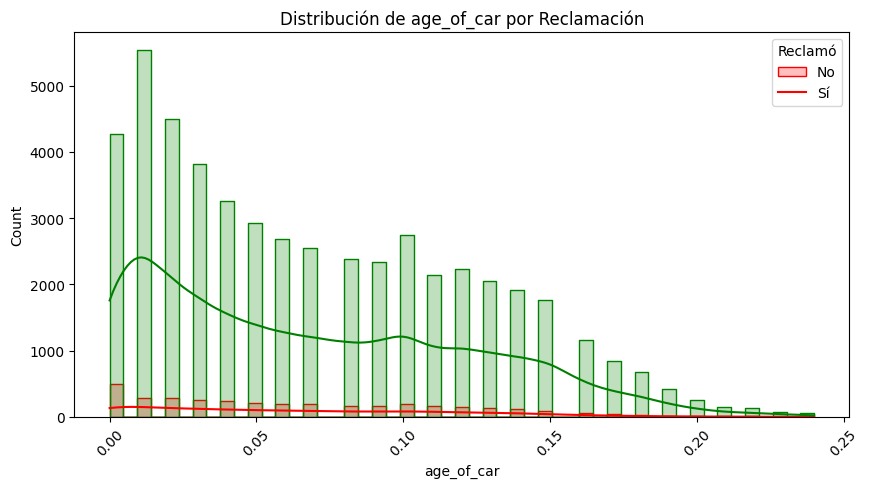

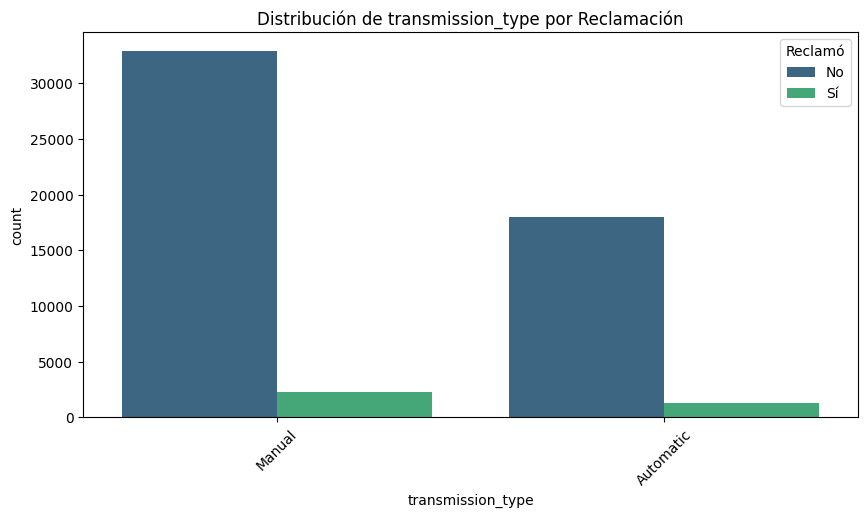

In [83]:

# 3. Visualizaciones específicas
# ----------------------------------------
# A. Antigüedad del vehículo (numérica)
plot_eda(df_sin_atipicos, 'age_of_car', plot_type='hist')

# B. Tipo de transmisión (categórica)
plot_eda(df_sin_atipicos, 'transmission_type', plot_type='bar')


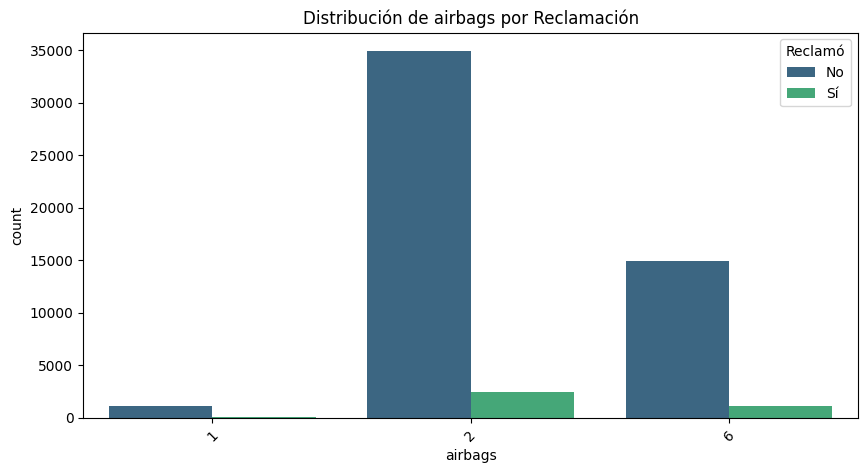

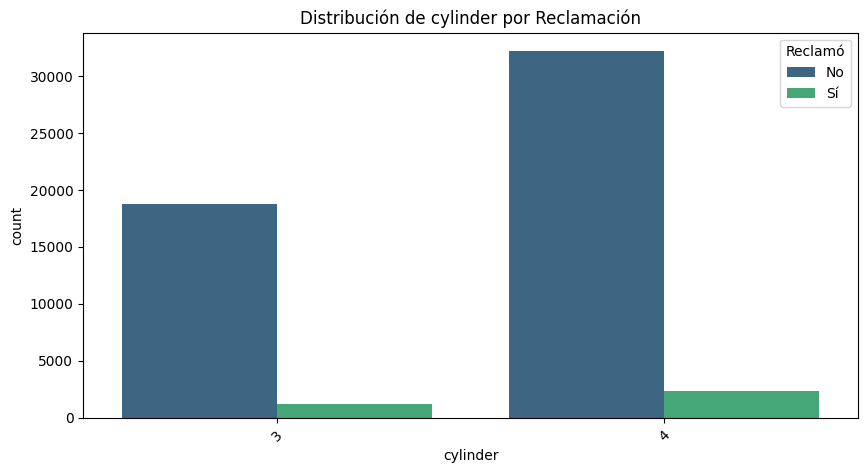


📊 Resultados Estadísticos:
🔹 age_of_car: t-statistic = 6.41, p-valor = 0.0000
🔹 transmission_type: Chi-cuadrado = 0.01, p-valor = 0.9121
🔹 airbags: Chi-cuadrado = 0.55, p-valor = 0.7577
🔹 cylinder: Chi-cuadrado = 13.46, p-valor = 0.0002


In [84]:

# C. Número de airbags (discreta)
plot_eda(df_sin_atipicos, 'airbags', plot_type='bar')

# D. Configuración de cilindros (discreta)
plot_eda(df_sin_atipicos, 'cylinder', plot_type='bar')

# 4. Análisis estadístico
def analizar_significancia(df, feature_col, target_col='is_claim'):
    if df[feature_col].dtype == 'object' or df[feature_col].nunique() < 5:
        # Test Chi-cuadrado para categóricas
        tabla = pd.crosstab(df[feature_col], df[target_col])
        chi2, p, _, _ = chi2_contingency(tabla)
        print(f"🔹 {feature_col}: Chi-cuadrado = {chi2:.2f}, p-valor = {p:.4f}")
    else:
        # Test t para numéricas
        grupo0 = df[df[target_col] == 0][feature_col]
        grupo1 = df[df[target_col] == 1][feature_col]
        t_stat, p = ttest_ind(grupo0, grupo1, equal_var=False)
        print(f"🔹 {feature_col}: t-statistic = {t_stat:.2f}, p-valor = {p:.4f}")

# Ejecutar tests
print("\n📊 Resultados Estadísticos:")
analizar_significancia(df_sin_atipicos, 'age_of_car')
analizar_significancia(df_sin_atipicos, 'transmission_type')
analizar_significancia(df_sin_atipicos, 'airbags')
analizar_significancia(df_sin_atipicos, 'cylinder')